#### Mobile Price_Range Classification

1) Read the 'train.csv' dataset<br>

2) Remove/handle null values if any<br>

3) Select price_range column as dependent feature and the remaining columns as dependent feature, split the data into training and test data with test data size as 25%<br>

4) Apply the following Algos on training data and generate the prediction on test data.<br>
a) Decision Tree<br>
b) Random Forest<br>
c) SVM with linear kernel<br>
d) Gaussian NB<br>

5) Generate confusion matrix and classification report for each algo used in Q4)<br>

6) Based on the Testing Accuracy, select the algo with its highest value and use it to build a model and train it on the entire 'train.csv' dataset.<br>

7) Read the 'test.csv' dataset<br>

8) Remove null values if any<br>

9) Apply the model built in Q6) and generate predictions for the test data.<br>

10) Create a new column in the test data as 'Pred_Price_Range' and populate it with the predicted values generated in Q9)<br>

11) Depict the count of predicted values in the 'test.csv' dataset on a bar chart and its precentage distribution on a pie chart separately.

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 1) Read the 'train.csv' dataset
df = pd.read_csv("C:/Users/Hp/Desktop/Python/TGC/Utkarsh Sir/Datasets/train.csv",)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
# 2) Remove/handle null values if any
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [4]:
df.price_range.value_counts()

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

In [5]:
# 3) Select price_range column as dependent feature and the remaining columns as independent feature, split the data into 
# training and test data with test data size as 25%
from sklearn.model_selection import train_test_split
X = df.drop("price_range",axis=1)
y = df.price_range
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1500, 20), (500, 20), (1500,), (500,))

In [6]:
# 4) Apply the following Algos on training data and generate the prediction on test data.
# a) Decision Tree
# b) Random Forest
# c) SVM with linear kernel
# d) Gaussian NB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [7]:
scores = {}
preds = {}
models = {"DTree":DecisionTreeClassifier(),
          "RF":RandomForestClassifier(),
          "SVM":SVC(kernel="linear"),
          "NB":GaussianNB()}
for name,model in models.items():
    model.fit(X_train,y_train)
    preds[name] = model.predict(X_test)
    scores[name] = model.score(X_test,y_test)
    
scores

{'DTree': 0.852, 'RF': 0.896, 'SVM': 0.968, 'NB': 0.794}

In [8]:
model_preds = pd.DataFrame(preds)
model_preds.DTree

0      1
1      3
2      1
3      1
4      1
      ..
495    2
496    1
497    3
498    3
499    1
Name: DTree, Length: 500, dtype: int64

In [9]:
# 5) Generate confusion matrix and classification report for each algo used in Q4)
from sklearn.metrics import confusion_matrix, classification_report
cm_dt = confusion_matrix(y_test,model_preds.DTree)
cm_rf = confusion_matrix(y_test,model_preds.RF)
cm_svm = confusion_matrix(y_test,model_preds.SVM)
cm_gnb = confusion_matrix(y_test,model_preds.NB)
print(f"For DecisionTrees:\nConfusion_Matrix:\n {cm_dt}\n\n{classification_report(y_test,model_preds.DTree)}")
print(f"For RandomForest:\nConfusion_Matrix:\n {cm_rf}\n\n{classification_report(y_test,model_preds.RF)}")
print(f"For SVM:\nConfusion_Matrix:\n {cm_svm}\n\n{classification_report(y_test,model_preds.SVM)}")
print(f"For GaussianNB:\nConfusion_Matrix:\n {cm_gnb}\n\n{classification_report(y_test,model_preds.NB)}")

For DecisionTrees:
Confusion_Matrix:
 [[103  15   0   0]
 [  9  97  11   0]
 [  0  11 105  11]
 [  0   0  17 121]]

              precision    recall  f1-score   support

           0       0.92      0.87      0.90       118
           1       0.79      0.83      0.81       117
           2       0.79      0.83      0.81       127
           3       0.92      0.88      0.90       138

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.86      0.85      0.85       500

For RandomForest:
Confusion_Matrix:
 [[112   6   0   0]
 [  1 105  11   0]
 [  0  15 104   8]
 [  0   0  11 127]]

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       118
           1       0.83      0.90      0.86       117
           2       0.83      0.82      0.82       127
           3       0.94      0.92      0.93       138

    accuracy                           0.90       500
   macro

**SVM with linear kernel works best so far amongst other models with 97% accuracy**

In [10]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [11]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [12]:
# 6) Based on the Testing Accuracy, select the algo with its highest value and use it to build a model and train it on the
# entire 'train.csv' dataset.
svc = SVC(kernel="linear")
svc.fit(X,y)

SVC(kernel='linear')

In [13]:
# 7) Read the 'test.csv' dataset
test_df = pd.read_csv("C:/Users/Hp/Desktop/Python/TGC/Utkarsh Sir/Datasets/test.csv")
test_df.drop("id",axis=1,inplace=True)
test_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [14]:
# 8) Remove null values if any
test_df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [15]:
# 9) Apply the model built in Q6) and generate predictions for the test data.
test_preds = svc.predict(test_df)
test_preds[:10]

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0], dtype=int64)

In [16]:
# 10) Create a new column in the test data as 'Pred_Price_Range' and populate it with the predicted values generated in Q9)
test_df["Pred_Price_Range"] = test_preds
test_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Pred_Price_Range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1


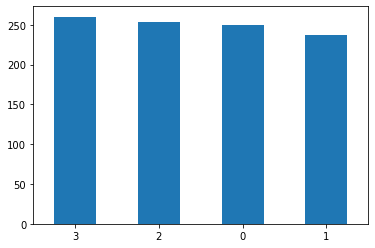

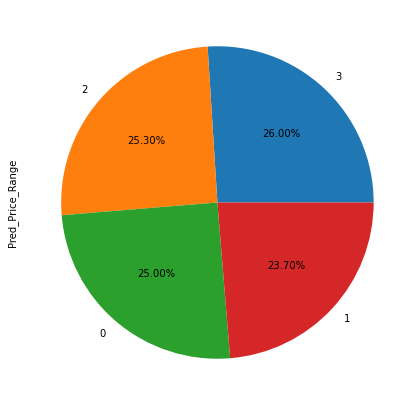

In [17]:
# 11) Depict the count of predicted values in the 'test.csv' dataset on a bar chart and its precentage distribution on a 
# pie chart separately.
test_df["Pred_Price_Range"].value_counts().plot.bar()
plt.xticks(rotation=0);
plt.figure(figsize=(7,8))
test_df["Pred_Price_Range"].value_counts().plot.pie(autopct="%.2f%%");